In [4]:
import numpy as np
import os
import random
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import sklearn.datasets, sklearn.decomposition
from matplotlib.transforms import ScaledTranslation


def traintestMNIST(labels=None, ntrain=None, ntest=None, path=os.path.join('data_for_python', 'mnist.npz')):
    mnist = np.load(path)
    train_x = mnist['train_x']
    train_y = mnist['train_y']
    train = np.asarray(list(zip(train_x, train_y)))

    test_x = mnist['test_x']
    test_y = mnist['test_y']
    test = np.asarray(list(zip(test_x, test_y)))

    if labels:
        train = list(train[np.hstack([np.where(train_y==l) for l in labels]).squeeze()])
        test = list(test[np.hstack([np.where(test_y==l) for l in labels]).squeeze()])

    random.shuffle(train)
    random.shuffle(test)

    train_x, train_y = zip(*train)
    test_x, test_y = zip(*test)

    if ntrain:
        train_x = train_x[:ntrain]
        train_y = train_y[:ntrain]

    if ntest:
        test_x = test_x[:ntest]
        test_y = test_y[:ntest]

    return np.asarray(train_x), np.asarray(train_y), np.asarray(test_x), np.asarray(test_y)

In [5]:
imgs, labs, imgs_test, labs_test = traintestMNIST([2], 5000)

In [8]:
pca = PCA() 
pca.fit(imgs)
pcs = pca.components_ #vecteurs propres
mu=pca.mean_ #esperance
M=783 #784-1
err=np.zeros(M)#array de 783 zeros 

In [15]:
for m in range(M): #pour chacun des vect propres
    pc=pcs[0:m+1] #nous donne les pc_i ds array de la forme (m+1,784)
    prod_scal=(imgs-mu)@(pc.T).real #forme (5000,m+1)
    rec=((prod_scal@pc)+mu).real #forme (5000,784)
    err[m]=np.mean((np.apply_along_axis(np.linalg.norm, 0, imgs - rec)) ** 2)
    
    

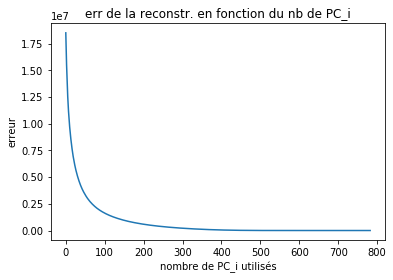

In [22]:
plt.plot(range(M),err)
plt.title("err de la reconstr. en fonction du nb de PC_i")
plt.xlabel('nombre de PC_i utilisés')
plt.ylabel('erreur')
plt.show()

In [37]:
acc_50=np.where(err<=0.5)
print("pour avoir une erreur inférieure ou égale à 50%, il faut utiliser les ",acc_50[0][0],"premiers PC_i") #on prend le premier
acc_95=np.where(err<=0.05)
print("pour avoir une erreur inférieure ou égale à 5%, il faut utiliser les ",acc_95[0][0],"premiers PC_i") #on prend le premier
acc_100=np.where(err==0)
#print(acc_100)
print("cependant avoir une erreur de 0% n'est pas possible car même en utilisant tous les PC_i on a une erreur de:",err[M-1])

pour avoir une erreur inférieure ou égale à 50%, il faut utiliser les  581 premiers PC_i
pour avoir une erreur inférieure ou égale à 5%, il faut utiliser les  585 premiers PC_i
cependant avoir une erreur de 0% n'est pas possible car même en utilisant tous les PC_i on a une erreur de: 5.503775940346347e-23


In [54]:
#partie 2)

imgs2, labs2, imgs_test2, labs_test2 = traintestMNIST([2], 5)

pca2 = PCA()
pca2.fit(imgs2)
pcs2 = pca2.components_
mu2 = pca2.mean_

[15101.79289877 14868.82503985 13292.32368661 11892.52654318
 11677.25560137 11358.4474333   9746.01622271  9200.55410933
  8607.59786531  8091.34035364]


D:\Programmes\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


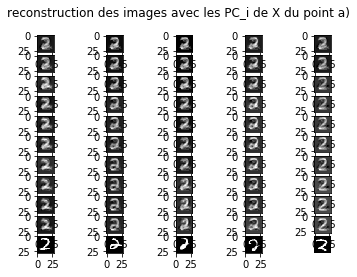

In [55]:
M2=10 #avec pcs du point a)
fig, axes = plt.subplots(nrows=11, ncols=5)

err2=np.zeros(M2)
for m in range(M2):
    pc2=pcs[0:m+1]
    prod_scal2=(imgs2-mu2)@(pc2.T).real
    rec2=((prod_scal2@pc2)+mu2).real
    err2[m]=np.mean((np.apply_along_axis(np.linalg.norm, 0, imgs2 - rec2)) ** 2)
    axes[m,0].imshow(rec2[0].reshape((28,28)),cmap='gray')
    axes[m,1].imshow(rec2[1].reshape((28,28)),cmap='gray')
    axes[m,2].imshow(rec2[2].reshape((28,28)),cmap='gray')
    axes[m,3].imshow(rec2[3].reshape((28,28)),cmap='gray')
    axes[m,4].imshow(rec2[4].reshape((28,28)),cmap='gray')
    
axes[M2,0].imshow(imgs[0].reshape((28,28)),cmap='gray')
axes[M2,1].imshow(imgs[1].reshape((28,28)),cmap='gray')
axes[M2,2].imshow(imgs[2].reshape((28,28)),cmap='gray')
axes[M2,3].imshow(imgs[3].reshape((28,28)),cmap='gray')
axes[M2,4].imshow(imgs[4].reshape((28,28)),cmap='gray')

print(err2)

plt.axis("off")
fig.tight_layout()
fig.suptitle("reconstruction des images avec les PC_i de X du point a)")
plt.show()

[1.01463437e+04 6.29503265e+03 2.58831485e+03 7.01735449e-27
 6.66182114e-27 6.66182114e-27 6.66182114e-27 6.66182114e-27
 6.66182114e-27 6.66182114e-27]


D:\Programmes\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


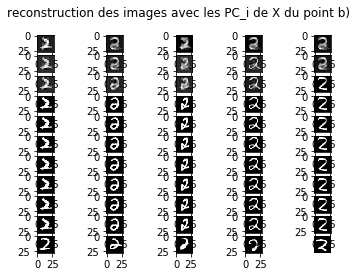

In [56]:
M2=10 #avec pcs du point 2)
fig, axes = plt.subplots(nrows=11, ncols=5)

err2=np.zeros(M2)
for m in range(M2):
    pc2=pcs2[0:m+1]
    prod_scal2=(imgs2-mu2)@(pc2.T).real
    rec2=((prod_scal2@pc2)+mu2).real
    err2[m]=np.mean((np.apply_along_axis(np.linalg.norm, 0, imgs2 - rec2)) ** 2)
    axes[m,0].imshow(rec2[0].reshape((28,28)),cmap='gray')
    axes[m,1].imshow(rec2[1].reshape((28,28)),cmap='gray')
    axes[m,2].imshow(rec2[2].reshape((28,28)),cmap='gray')
    axes[m,3].imshow(rec2[3].reshape((28,28)),cmap='gray')
    axes[m,4].imshow(rec2[4].reshape((28,28)),cmap='gray')
    
axes[M2,0].imshow(imgs[0].reshape((28,28)),cmap='gray')
axes[M2,1].imshow(imgs[1].reshape((28,28)),cmap='gray')
axes[M2,2].imshow(imgs[2].reshape((28,28)),cmap='gray')
axes[M2,3].imshow(imgs[3].reshape((28,28)),cmap='gray')
axes[M2,4].imshow(imgs[4].reshape((28,28)),cmap='gray')

print(err2)

plt.axis("off")
fig.tight_layout()
fig.suptitle("reconstruction des images avec les PC_i de X du point b)")
plt.show()